In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df=pd.read_json('logins.json')

In [3]:
df.shape

(93142, 1)

In [4]:
df.tail(15)

,login_time
93127,1970-04-13 18:14:55
93128,1970-04-13 18:12:34
93129,1970-04-13 18:35:43
93130,1970-04-13 18:36:55
93131,1970-04-13 18:43:19
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52


In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df['times']=1
df['Date']=df['login_time'].dt.date
df['Day']=df['login_time'].dt.weekday

In [7]:
df=df.set_index('login_time')
df.head()

,times,Date,Day
login_time,,,
1970-01-01 20:13:18,1,1970-01-01,3
1970-01-01 20:16:10,1,1970-01-01,3
1970-01-01 20:16:37,1,1970-01-01,3
1970-01-01 20:16:36,1,1970-01-01,3
1970-01-01 20:26:21,1,1970-01-01,3


In [8]:
df.Day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

In [9]:
df.head()

,times,Date,Day
login_time,,,
1970-01-01 20:13:18,1,1970-01-01,Thursday
1970-01-01 20:16:10,1,1970-01-01,Thursday
1970-01-01 20:16:37,1,1970-01-01,Thursday
1970-01-01 20:16:36,1,1970-01-01,Thursday
1970-01-01 20:26:21,1,1970-01-01,Thursday


In [10]:
df.head()

,times,Date,Day
login_time,,,
1970-01-01 20:13:18,1,1970-01-01,Thursday
1970-01-01 20:16:10,1,1970-01-01,Thursday
1970-01-01 20:16:37,1,1970-01-01,Thursday
1970-01-01 20:16:36,1,1970-01-01,Thursday
1970-01-01 20:26:21,1,1970-01-01,Thursday


In [11]:
df_15min= df.groupby(pd.Grouper(freq="15 min")).sum()

In [12]:
df_15min.head()

,times
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [13]:
df_15min.shape

(9788, 1)

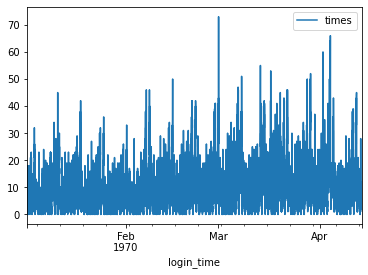

In [14]:
df_15min.plot()

In [15]:
np.mean(df_15min)

times    9.515938
dtype: float64

In [16]:
df_day= df.groupby(pd.Grouper(freq="1 D")).sum()

In [48]:
df_day['Time']=df_day.index
df_day['Day']=df_day.Time.dt.weekday
df_day.Day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
df_day.Day.value_counts()

Sunday       15
Friday       15
Saturday     15
Wednesday    14
Tuesday      14
Thursday     14
Monday       14
Name: Day, dtype: int64

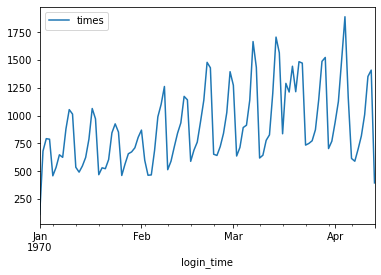

In [17]:
df_day.plot()

In [18]:
df2=df.loc['1970-01-02':'1970-04-12']

<ipython-input-18-0ec098daefee>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df2=df.loc['1970-01-02':'1970-04-12']


In [19]:
df2.head()

,times,Date,Day
login_time,,,
1970-01-02 00:03:02,1,1970-01-02,Friday
1970-01-02 00:01:54,1,1970-01-02,Friday
1970-01-02 00:05:34,1,1970-01-02,Friday
1970-01-02 00:11:34,1,1970-01-02,Friday
1970-01-02 00:04:39,1,1970-01-02,Friday


In [20]:
df_day= df2.groupby(pd.Grouper(freq="1 D")).sum()

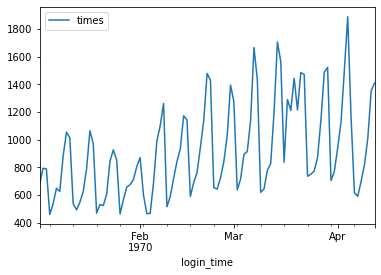

In [21]:
df_day.plot();

In [22]:
df_weekday=df2.groupby(df2.Day).sum()
weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday=df_weekday.reindex(index=weekday)
df_weekday

,times
Day,
Monday,8428
Tuesday,9268
Wednesday,10339
Thursday,11848
Friday,15208
Saturday,19377
Sunday,18167


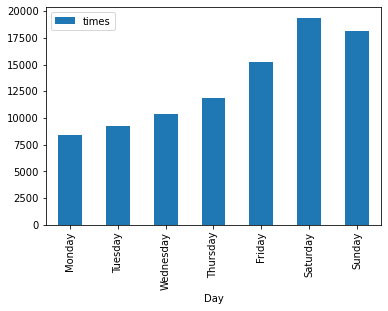

In [23]:
df_weekday.plot.bar()

In [24]:
df_day.shape

(101, 1)

In [25]:
df_day.iloc[1]

times    793
Name: 1970-01-03 00:00:00, dtype: int64

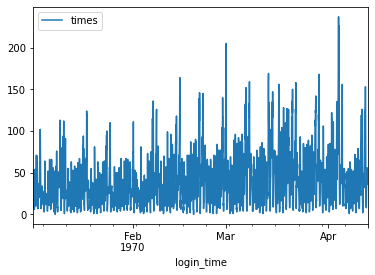

In [26]:
df_1h=df2.groupby(pd.Grouper(freq="1 H")).sum()
df_1h.plot()

In [27]:
df_1h['Day']=df_1h.index
df_1h['Day']=df_1h['Day'].dt.weekday
df_1h.Day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

In [28]:
df_1h.head()

,times,Day
login_time,,
1970-01-02 00:00:00,53,Friday
1970-01-02 01:00:00,33,Friday
1970-01-02 02:00:00,43,Friday
1970-01-02 03:00:00,28,Friday
1970-01-02 04:00:00,9,Friday


In [29]:
df_1h['time']=df_1h.index
df_1h['time']=df_1h['time'].dt.time
df_1h

,times,Day,time
login_time,,,
1970-01-02 00:00:00,53,Friday,00:00:00
1970-01-02 01:00:00,33,Friday,01:00:00
1970-01-02 02:00:00,43,Friday,02:00:00
1970-01-02 03:00:00,28,Friday,03:00:00
1970-01-02 04:00:00,9,Friday,04:00:00
...,...,...,...
1970-04-12 19:00:00,48,Sunday,19:00:00
1970-04-12 20:00:00,48,Sunday,20:00:00
1970-04-12 21:00:00,55,Sunday,21:00:00


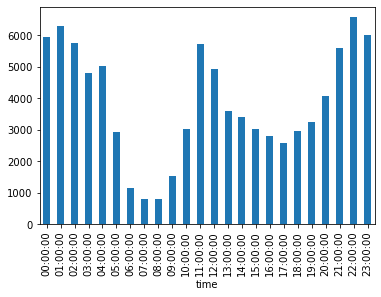

In [30]:
df_1hD=df_1h.times.groupby(df_1h.time).sum()
df_1hD.plot.bar();

In [31]:
df_1hD=df_1h.times.groupby(by=[df_1h.time, df_1h.Day]).sum()
df_1hD

time      Day      
00:00:00  Friday        975
          Monday        499
          Saturday     1254
          Sunday       1123
          Thursday      816
                       ... 
23:00:00  Saturday     1006
          Sunday        557
          Thursday      975
          Tuesday       724
          Wednesday     908
Name: times, Length: 168, dtype: int64

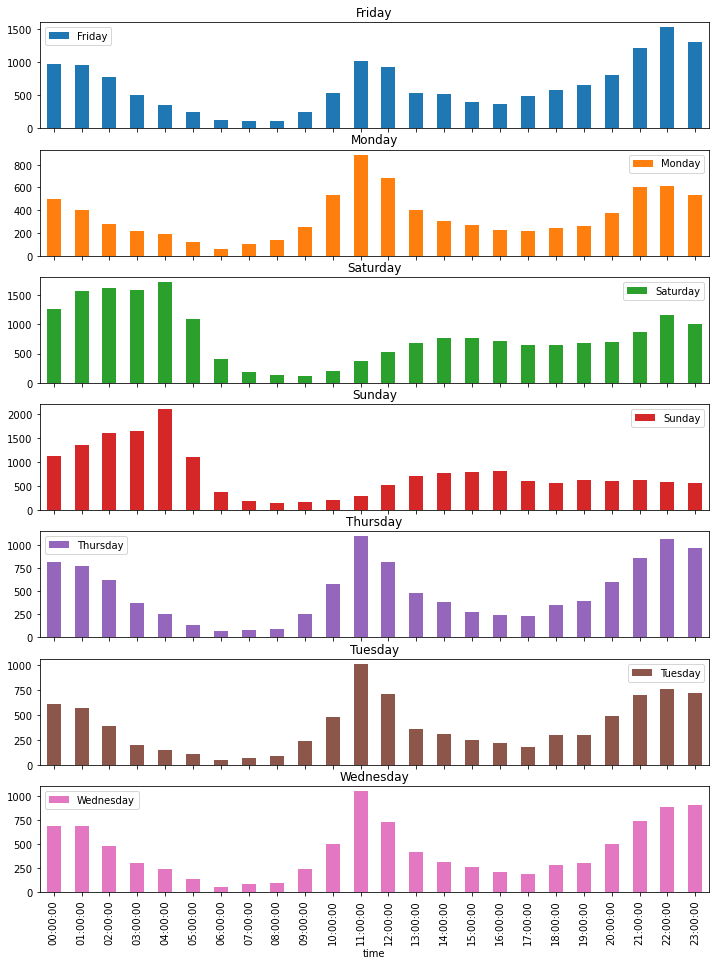

In [32]:
df_1hD.unstack(level=1).plot(kind='bar', subplots=True, figsize=(12,16));

In [34]:
df_15min['Day']=df_15min.index
df_15min['Day']=df_15min['Day'].dt.weekday
df_15min.Day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

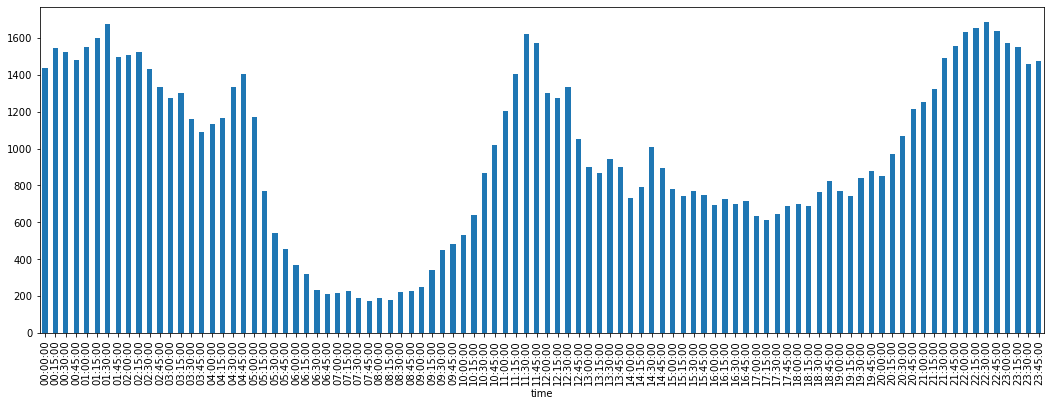

In [57]:
df_15min['time']=df_15min.index
df_15min['time']=df_15min['time'].dt.time
df_15minD=df_15min.times.groupby(df_15min.time).sum()
df_15minD.plot.bar(figsize=(18,6));

In [51]:
df_15minD=df_15min.times.groupby(by=[df_15min.time, df_15min.Day]).sum()
df_15minD

time      Day      
00:00:00  Friday       237
          Monday       126
          Saturday     297
          Sunday       260
          Thursday     214
                      ... 
23:45:00  Saturday     240
          Sunday       159
          Thursday     241
          Tuesday      175
          Wednesday    232
Name: times, Length: 672, dtype: int64

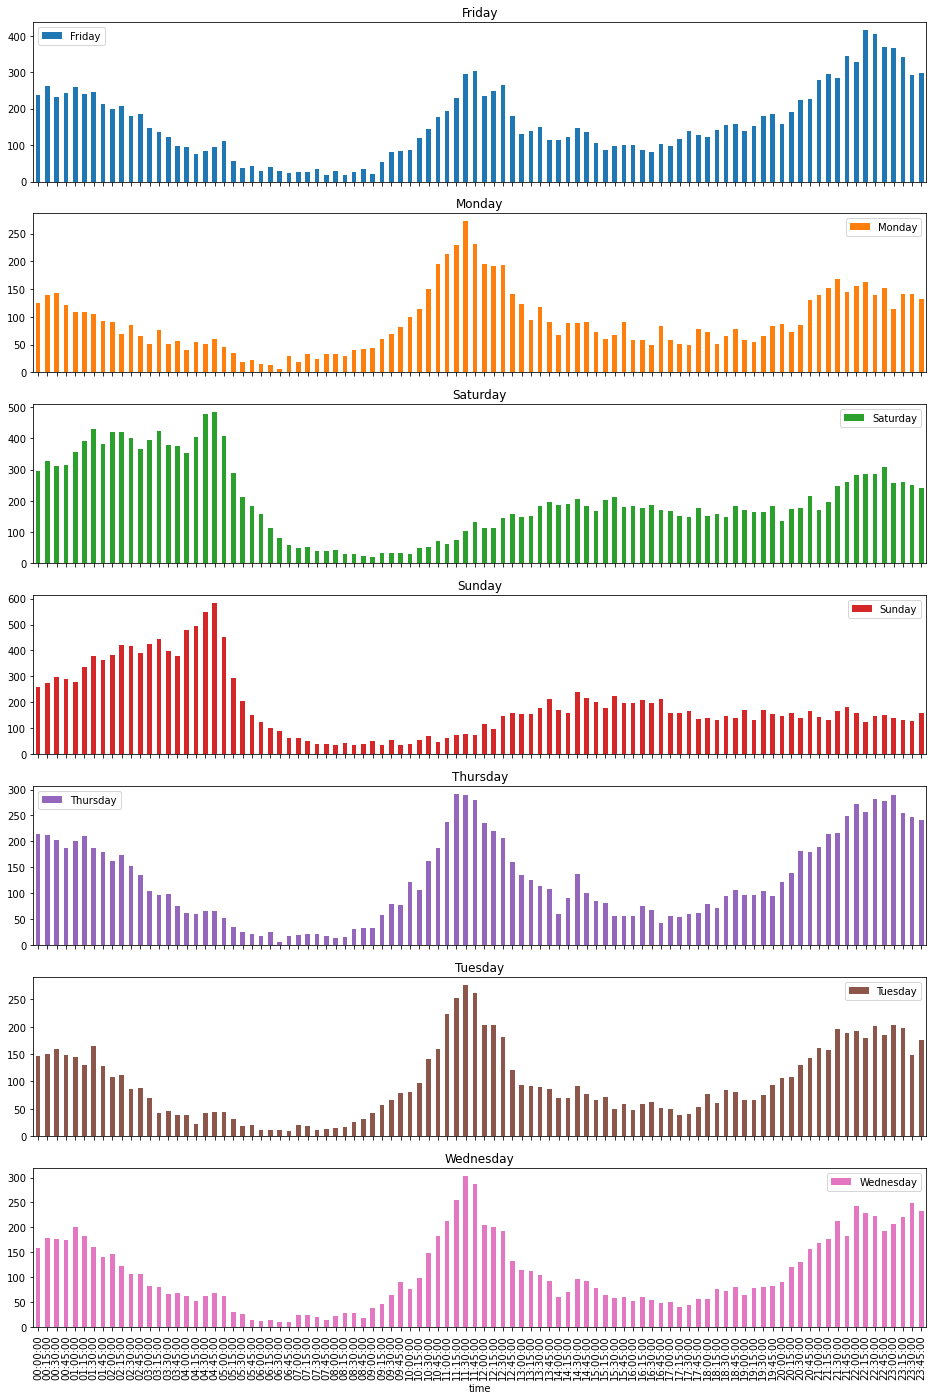

In [54]:
df_15minD.unstack(level=1).plot(kind='bar', subplots=True, figsize=(16,24));

In [ ]:
# The login times varied a lot by weekdays and time solts during the day, with Saturday highest, followed by Sunday, Friday, Thursday, Wednesday, Tuesday
# and Mondy. On Saturdays and Sundays, the early morning time (4-5 am)saw the highest login times. On Monday to Thursday, the midnoon (11am-12pm)
# was te highest login time. On Fridays, the midnoon was still a high time, but the highest time is 11-12pm.

In [ ]:
# Part 2 Experiment and metrics design
# I will do a t test to check if the policy change is successful.
# I will collect data of the daily numbers of cars cross the bridges
# Compare the daily car numbers cross the bridge before and after the polcy change.
# Is the change statitically significant? What is the P value if we assume there is no change 
# How about the weekdays and weekends? Is there any difference of impact from the policy change and why?

